In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Drive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

In [ ]:
# reading data from csv
df = pd.read_csv("/content/drive/MyDrive/Electricity_Production_By_Source.csv")
df.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0


In [ ]:
# loading ISO 3166 dataset to check full list of existing countries based on Alpha-3 codes.
iso_a3=pd.read_csv("country code.csv",encoding = "ISO-8859-1")
iso_a3_list = list(iso_a3['Alpha-3 code'])
iso_a3.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [ ]:
# replace null values with 0
df = df.fillna(0)
# create a new column for total electricity production
df['Total'] = df.iloc[:, 3:].sum(axis=1)

In [ ]:
# check if Code not matches with ISO Alpha-3 codes to detect Totals and Region Sub-totals in the dataset
SubTotal_codes = df[~df['Code'].isin(iso_a3_list)]
SubTotal_codes = SubTotal_codes.groupby(['Entity', 'Code'])['Total'].sum().sort_values(ascending=False).reset_index()

In [ ]:
# filter dataset only for rows which have a valid ISO code, so represent real country
df = df[df['Code'].isin(iso_a3_list)]
df_year = df.groupby('Year')[['Electricity from coal (TWh)', 'Electricity from gas (TWh)', 'Electricity from hydro (TWh)', 'Electricity from other renewables (TWh)', 'Electricity from solar (TWh)', 'Electricity from oil (TWh)', 'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)']].sum().reset_index()

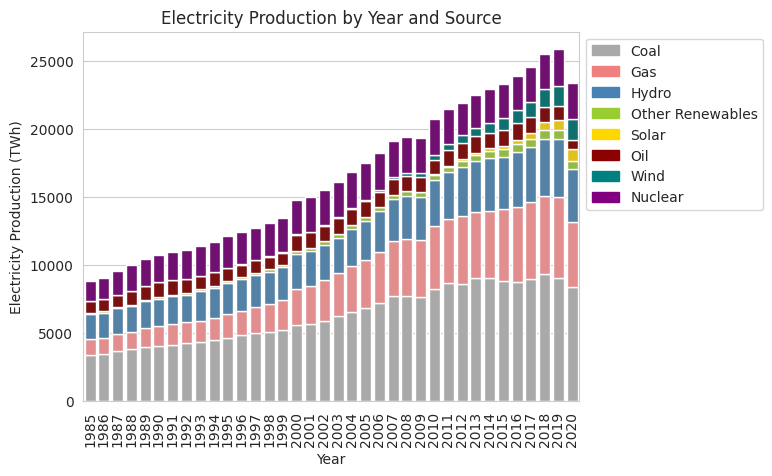

In [ ]:
# Chart 1 - Electricity Production by Year and Source
sns.set_style("whitegrid")

# Define the label and color for each energy source
energy_sources = {
    "Coal": "darkgray",
    "Gas": "lightcoral",
    "Hydro": "steelblue",
    "Other Renewables": "yellowgreen",
    "Solar": "gold",
    "Oil": "darkred",
    "Wind": "teal",
    "Nuclear": "purple"
}

# Plot the bar chart
ax = sns.barplot(x="Year", y="Electricity from coal (TWh)", data=df_year, color=energy_sources["Coal"])
for source in list(energy_sources.keys())[1:]:
    ax = sns.barplot(x="Year", y=f"Electricity from {source.lower()} (TWh)", data=df_year, color=energy_sources[source], bottom=df_year[[f"Electricity from {prev.lower()} (TWh)" for prev in list(energy_sources.keys())[:list(energy_sources.keys()).index(source)]]].sum(axis=1))

# Add the legend
handles = [plt.Rectangle((0,0),1,1, color=energy_sources[source]) for source in energy_sources]
labels = list(energy_sources.keys())
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1))

ax.set_title("Electricity Production by Year and Source")
ax.set_ylabel("Electricity Production (TWh)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Select the data for the decade 2010-2019
df_decade = df[df['Year'].between(2010, 2019)]

# Group the data by Entity and Source of electricity
df_grouped = df_decade.groupby('Entity')[['Electricity from coal (TWh)', 'Electricity from gas (TWh)',
                                                     'Electricity from hydro (TWh)', 'Electricity from other renewables (TWh)',
                                                     'Electricity from solar (TWh)', 'Electricity from oil (TWh)',
                                                     'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)','Total']].sum().reset_index()

In [ ]:
# get top 10 by total production to limit the chart
top_10 = df_grouped.groupby('Entity').sum().sort_values(by='Total', ascending=False).reset_index().head(10)

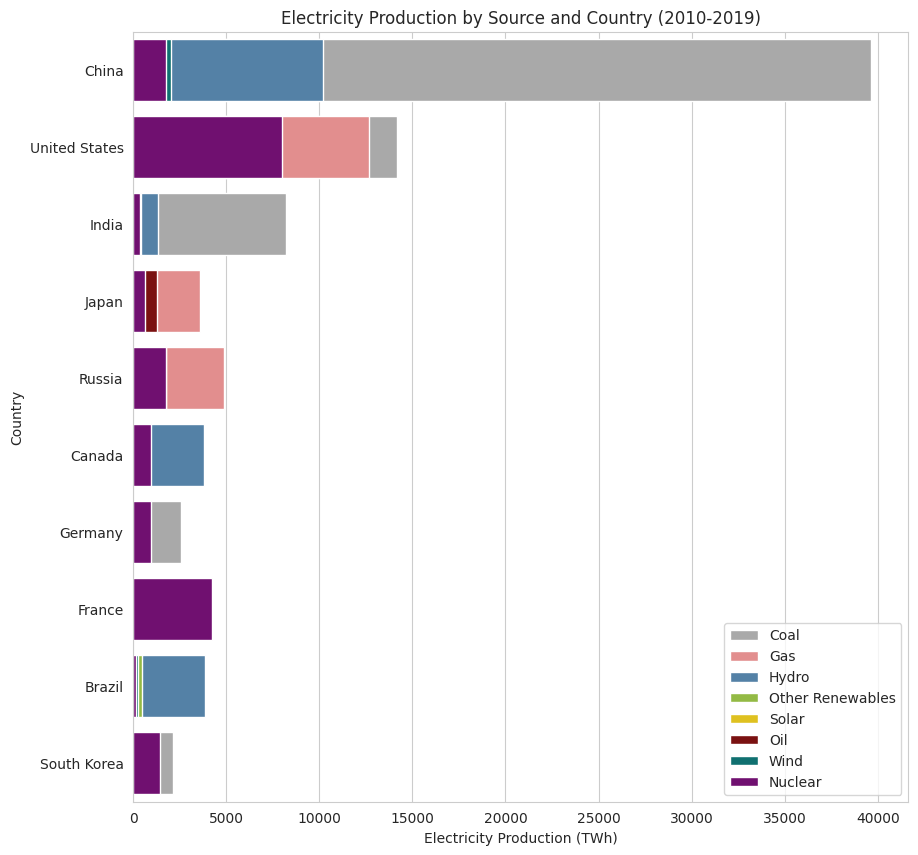

In [ ]:
# Create a stacked bar chart for production per source per country
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x="Electricity from coal (TWh)", y="Entity", data=top_10, label="Coal", color="darkgray")
sns.barplot(x="Electricity from gas (TWh)", y="Entity", data=top_10, label="Gas", color="lightcoral")
sns.barplot(x="Electricity from hydro (TWh)", y="Entity", data=top_10, label="Hydro", color="steelblue")
sns.barplot(x="Electricity from other renewables (TWh)", y="Entity", data=top_10, label="Other Renewables", color="yellowgreen")
sns.barplot(x="Electricity from solar (TWh)", y="Entity", data=top_10, label="Solar", color="gold")
sns.barplot(x="Electricity from oil (TWh)", y="Entity", data=top_10, label="Oil", color="darkred")
sns.barplot(x="Electricity from wind (TWh)", y="Entity", data=top_10, label="Wind", color="teal")
sns.barplot(x="Electricity from nuclear (TWh)", y="Entity", data=top_10, label="Nuclear", color="purple")

ax.set(xlabel="Electricity Production (TWh)", ylabel="Country", title="Electricity Production by Source and Country (2010-2019)")
ax.legend(loc="lower right")
plt.show()

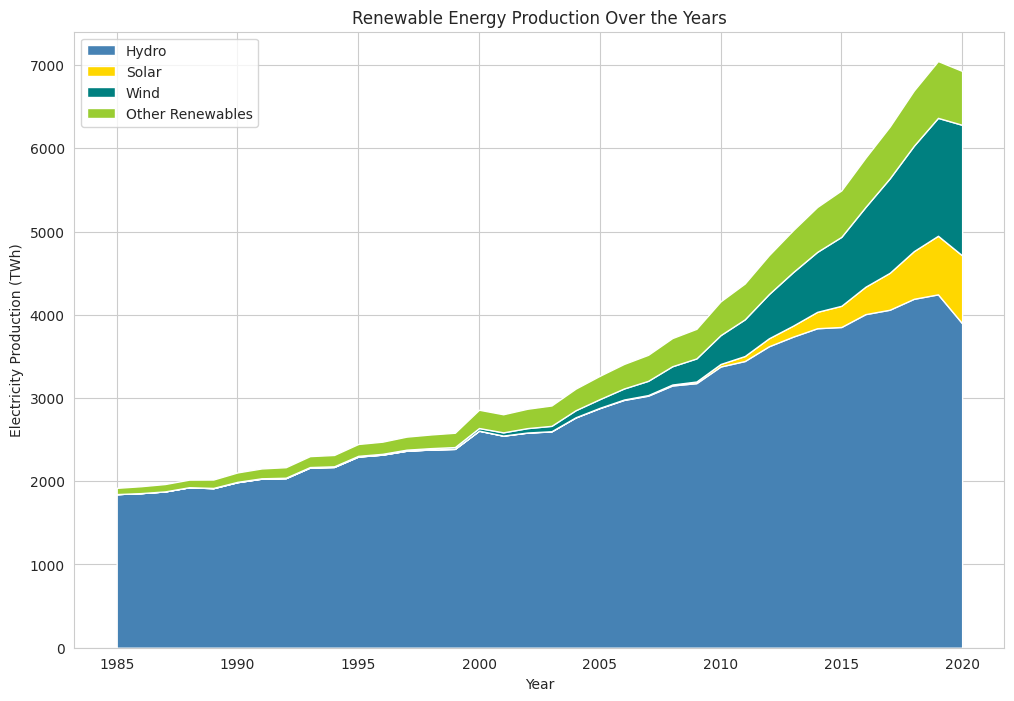

In [ ]:
# Selecting relevant columns for the stacked area chart
df_renewable = df_year[['Year', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Electricity from wind (TWh)', 'Electricity from other renewables (TWh)']]

# Plotting the stacked area chart for renewable energy sources
plt.figure(figsize=(12, 8))
plt.stackplot(df_renewable['Year'],
              df_renewable['Electricity from hydro (TWh)'],
              df_renewable['Electricity from solar (TWh)'],
              df_renewable['Electricity from wind (TWh)'],
              df_renewable['Electricity from other renewables (TWh)'],
              labels=['Hydro', 'Solar', 'Wind', 'Other Renewables'],
              colors=['steelblue', 'gold', 'teal', 'yellowgreen'])

plt.title('Renewable Energy Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend(loc='upper left')
plt.show()


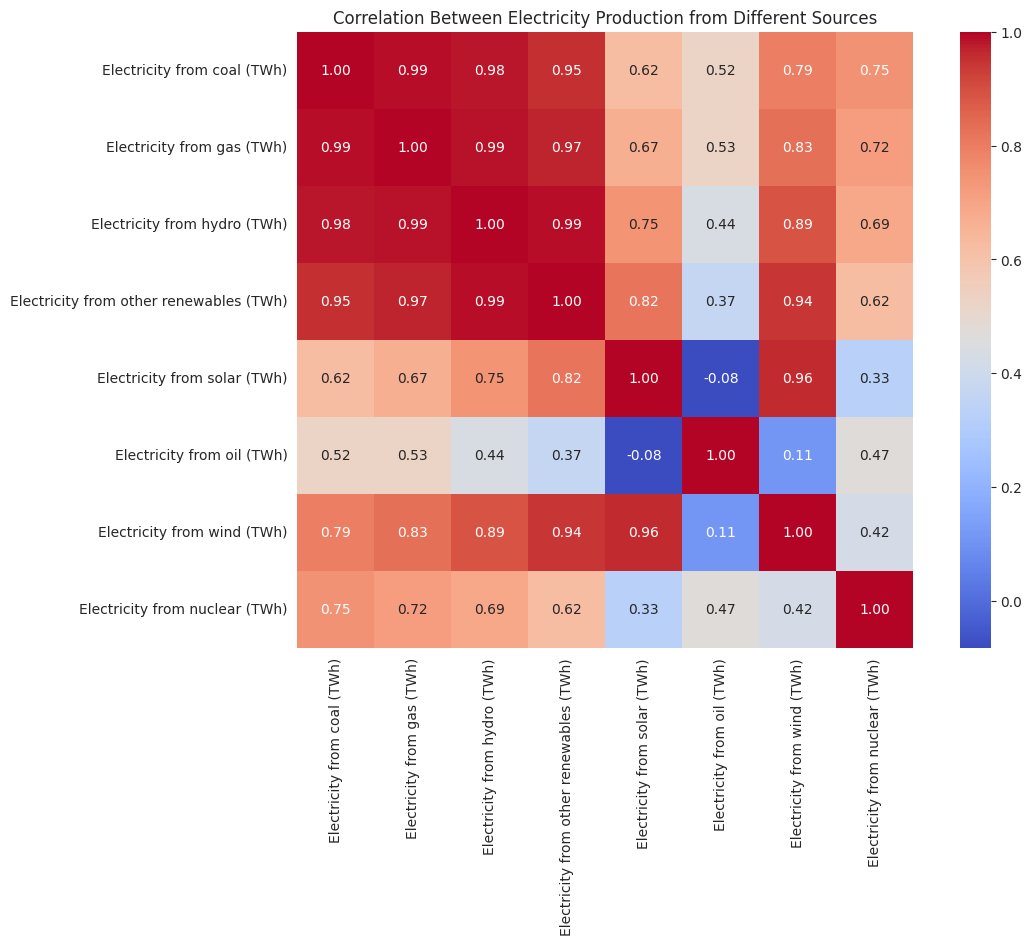

In [ ]:
# Selecting relevant columns for correlation heatmap
df_corr = df_year[['Electricity from coal (TWh)', 'Electricity from gas (TWh)', 'Electricity from hydro (TWh)',
                   'Electricity from other renewables (TWh)', 'Electricity from solar (TWh)', 'Electricity from oil (TWh)',
                   'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)']]

# Calculating the correlation matrix
corr_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Between Electricity Production from Different Sources')
plt.show()


In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset and perform necessary preprocessing
df = pd.read_csv("Electricity_Production_By_Source.csv")
iso_a3 = pd.read_csv("country code.csv", encoding="ISO-8859-1")
iso_a3_list = list(iso_a3['Alpha-3 code'])
df = df.fillna(0)
df['Total'] = df.iloc[:, 3:].sum(axis=1)
df = df[df['Code'].isin(iso_a3_list)]
df_year = df.groupby('Year')[['Electricity from coal (TWh)', 'Electricity from gas (TWh)', 'Electricity from hydro (TWh)', 'Electricity from other renewables (TWh)', 'Electricity from solar (TWh)', 'Electricity from oil (TWh)', 'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)']].sum().reset_index()
df_year['Total'] = df_year.iloc[:, 1:].sum(axis=1)  # Add 'Total' column

# Visualization 1: Line chart for Total Electricity Production over the Years
fig1 = px.line(df_year, x='Year', y='Total', title='Total Electricity Production Over the Years')

# Visualization 2: Bar chart for Electricity Production by Source
fig2 = px.bar(df_year, x='Year', y=df_year.columns[1:], title='Electricity Production by Source Over the Years',
              labels={'value': 'Electricity Production (TWh)', 'variable': 'Energy Source'})

# Visualization 3: Top 10 countries by Total Electricity Production (2010-2019)
df_decade = df[df['Year'].between(2010, 2019)]
df_grouped = df_decade.groupby('Entity')[['Total']].sum().reset_index().sort_values(by='Total', ascending=False).head(10)
fig3 = px.bar(df_grouped, x='Total', y='Entity', orientation='h', title='Top 10 Countries by Total Electricity Production (2010-2019)',
              labels={'Total': 'Electricity Production (TWh)', 'Entity': 'Country'})

# Visualization 4: Stacked Area Chart for Renewable Energy Production
df_renewable = df_year[['Year', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Electricity from wind (TWh)', 'Electricity from other renewables (TWh)']]
fig4 = px.area(df_renewable, x='Year', y=df_renewable.columns[1:], title='Renewable Energy Production Over the Years',
               labels={'value': 'Electricity Production (TWh)', 'variable': 'Renewable Source'})

# Combine the visualizations into a dashboard-style layout
fig1.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))
fig2.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))
fig3.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))
fig4.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))

# Display the dashboard
fig1.show()
fig2.show()
fig3.show()
fig4.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset and perform necessary preprocessing
df = pd.read_csv("Electricity_Production_By_Source.csv")
iso_a3 = pd.read_csv("country code.csv", encoding="ISO-8859-1")
iso_a3_list = list(iso_a3['Alpha-3 code'])
df = df.fillna(0)
df['Total'] = df.iloc[:, 3:].sum(axis=1)
df = df[df['Code'].isin(iso_a3_list)]
df_year = df.groupby('Year')[['Electricity from coal (TWh)', 'Electricity from gas (TWh)', 'Electricity from hydro (TWh)', 'Electricity from other renewables (TWh)', 'Electricity from solar (TWh)', 'Electricity from oil (TWh)', 'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)']].sum().reset_index()
df_year['Total'] = df_year.iloc[:, 1:].sum(axis=1)  # Add 'Total' column

# Visualization 1: Line chart for Total Electricity Production over the Years
fig1 = px.line(df_year, x='Year', y='Total', title='Total Electricity Production Over the Years')

# Visualization 2: Bar chart for Electricity Production by Source
fig2 = px.bar(df_year, x='Year', y=df_year.columns[1:], title='Electricity Production by Source Over the Years',
              labels={'value': 'Electricity Production (TWh)', 'variable': 'Energy Source'})

# Visualization 3: Pie chart for the distribution of Electricity Production by Source (latest year)
latest_year = df_year['Year'].max()
df_latest_year = df[df['Year'] == latest_year]
fig3 = px.pie(df_latest_year, values=df_latest_year.columns[3:], names=df_latest_year.columns[3:], title=f'Distribution of Electricity Production by Source ({latest_year})')

# Visualization 4: Scatter plot for Total Electricity Production vs. Nuclear Production
fig4 = px.scatter(df_year, x='Total', y='Electricity from nuclear (TWh)',
                  title='Total Electricity Production vs. Nuclear Production',
                  labels={'Total': 'Total Electricity Production (TWh)', 'Electricity from nuclear (TWh)': 'Nuclear Production (TWh)'})

# Visualization 5: Choropleth map for Total Electricity Production by Country (latest year)
fig5 = px.choropleth(df_latest_year, locations='Code', color='Total', hover_name='Entity',
                    title=f'Total Electricity Production by Country ({latest_year})',
                    color_continuous_scale='Viridis')

# Combine the visualizations into a dashboard-style layout
fig1.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))
fig2.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))
fig3.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))
fig4.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))
fig5.update_layout(template='plotly_dark', margin=dict(l=10, r=10, t=40, b=10))

# Display the dashboard
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
